In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from enum import Enum

from webencodings import labels

round_digit = 4

In [36]:
# Read input data from csv file

df = pd.read_csv('input.csv')

In [37]:
# Function to standardize a data vector

def standardize(data: np.array) -> np.array:
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [38]:
# Function to normalize a data vector

def normalize(data: np.array) -> np.array:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [39]:
data = df[['Outstate', 'F.Undergrad', 'Grad.Rate']]
data = data.to_numpy()

data_std = standardize(data)

data.shape[0]

777

In [40]:
def is_terminated(oldCentroids, centroids):
    for i in range(centroids.shape[0]):
        for j in range(centroids.shape[1]):
            if abs(oldCentroids[i][j] - centroids[i][j]) > 0.001:
                return False
    return True

In [41]:
def dist(data, centroids):
    dist_sum = 0
    for i in range(data.shape[0]):
        dist_sum += (data[i] - centroids[i]) ** 2
    return np.sqrt(dist_sum)

In [42]:
def get_labels(data, centroids) -> np.array:
    labels = np.empty(data.shape[0])
    distances = np.full(data.shape[0], float('inf'))
    
    for i in range(data.shape[0]):
        for c in range(centroids.shape[0]):
            d = dist(data[i], centroids[c])
            if d < distances[i]:
                distances[i] = d
                labels[i] = c
    
    return labels

In [43]:
def get_centroids(data, labels, k):
    
    #error
    centroids = np.array([data[random.randint(0, data.shape[0] - 1)] for i in range(k)])

    for c in range(0, k):
        #centroid_prod = np.empty(centroids.shape[1])
        centroid_sum = np.empty(centroids.shape[1])
        centroid_cnt = 0
        for i in range(labels.shape[0]):
            if labels[i] == c:
                centroid_cnt += 1
                centroid_sum += data[i]
                #centroid_prod = centroid_prod * data[i]
        centroids[c] = centroid_sum / centroid_cnt
        #centroids[c] = np.power(centroid_prod, 1/centroid_prod.shape[0])
    
    return centroids

In [44]:
def k_means(data, k):
    centroids = np.array([data[random.randint(0, data.shape[0] - 1)] for i in range(k)])           
    
    
    #error: possible same randoms
    oldCentroids = np.array([data[random.randint(0, data.shape[0] - 1)] for i in range(k)])
    inter = 0
    while not is_terminated(oldCentroids, centroids) and inter < 1000:
        inter += 1
        oldCentroids = centroids
        labels = get_labels(data, centroids)
        
        centroids = get_centroids(data, labels, k)
        
        centroids = np.sort(centroids, axis=0)
        oldCentroids = np.sort(oldCentroids, axis=0)
        
    print(oldCentroids ,"\n")
    #print(centroids)
    return centroids, labels

In [45]:
centroids, labels = k_means(data, 2)
print(centroids)

[[ 8916  4071    62]
 [11490 16601    72]] 

[[ 8916  4071    62]
 [11490 16601    72]]


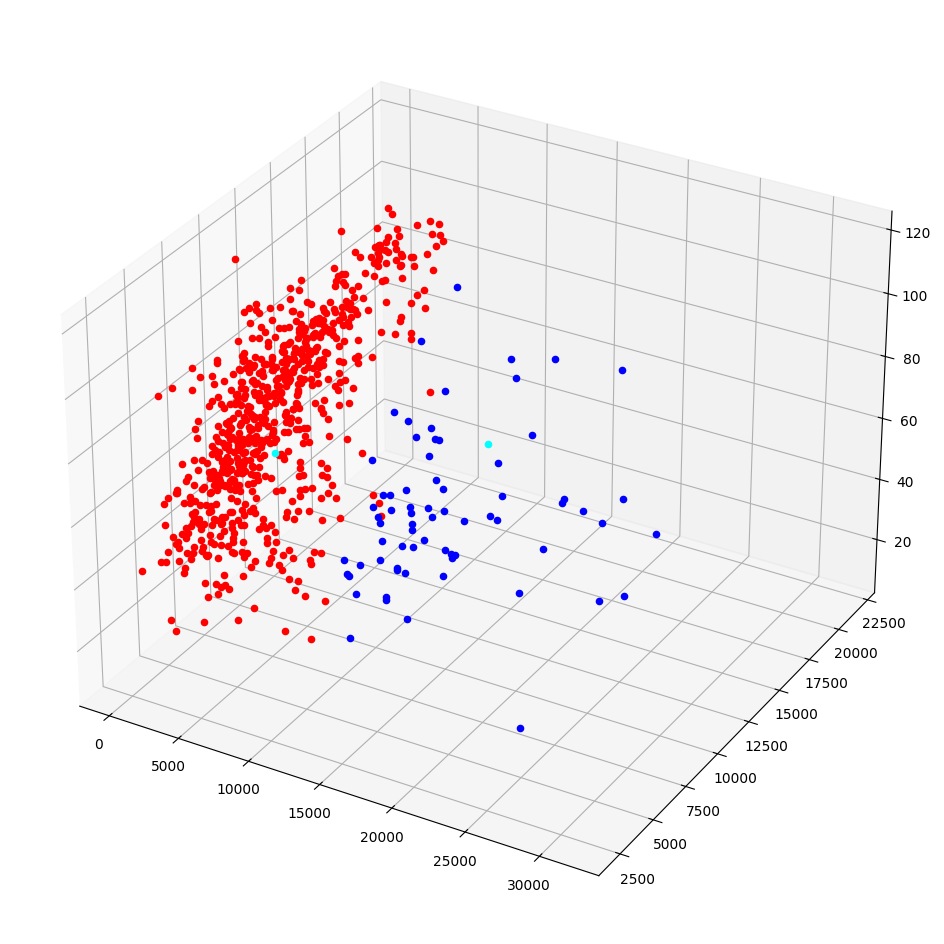

In [46]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data.shape[0]):
    if labels[i] == 0:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')    

    
#ax.scatter(df.loc[:, 'Outstate'], df.loc[:, 'F.Undergrad'], df.loc[:, 'Grad.Rate'])
for i in range(centroids.shape[0]):
   ax.scatter(centroids[i][1], centroids[i][0], centroids[i][2], color='cyan')

plt.show()

In [47]:
label_data = df[['Private']]

private_cnt = df['Private'].value_counts()['Yes']
public_cnt = df['Private'].value_counts()['No']
privates = np.zeros(data.shape[1])
publics = np.zeros(data.shape[1])

label_data = label_data.to_numpy()

for i in range(data.shape[0]):
    if label_data[i] == "Yes":
        privates += data[i]
    else:
        publics += data[i]

priv = privates / private_cnt
pub = publics / public_cnt

print(priv, "\n")
print(pub)

[11801.69380531  1872.16814159    68.99823009] 

[6813.41037736 8571.00471698   56.04245283]


In [48]:
cnt = 0
for i in range(data.shape[0]):
    if label_data[i] == "Yes" and labels[i] == 0:
        cnt += 1
    if label_data[i] == "No" and labels[i] == 1:
        cnt += 1
print(cnt/data.shape[0])

0.7966537966537967


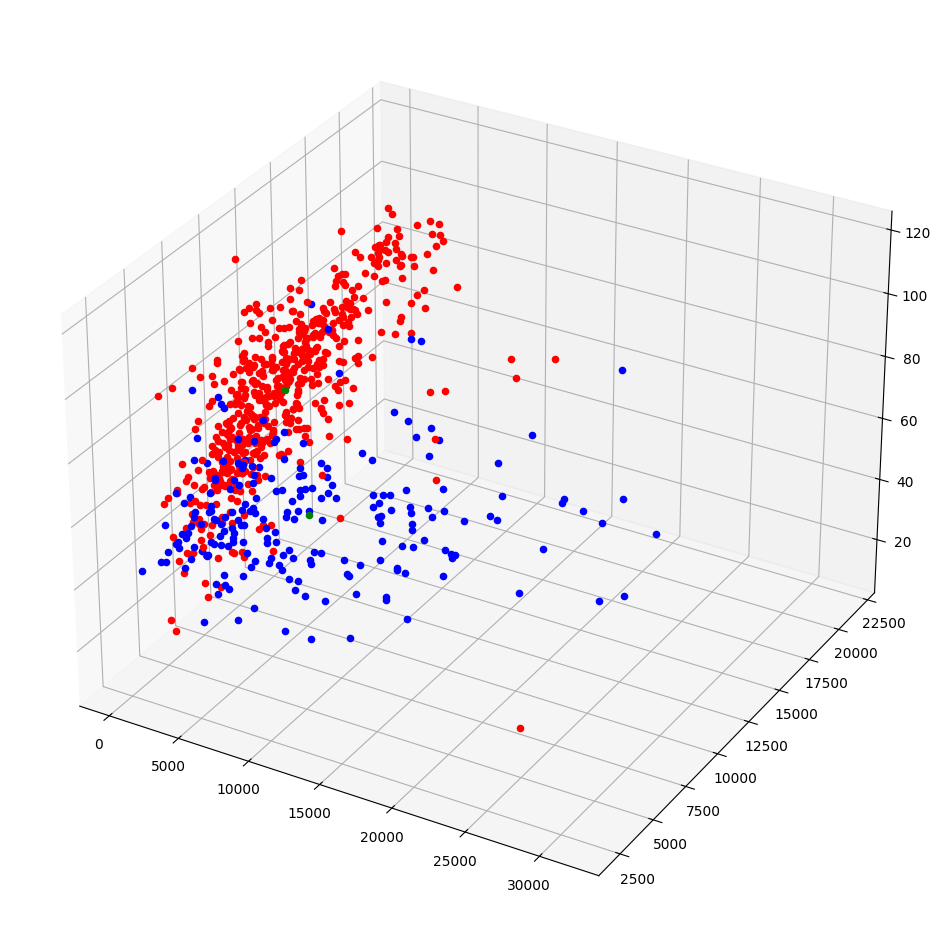

In [49]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')    

    
#for i in range(centroids.shape[0]):
#   ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], color='cyan')
    
ax.scatter(1872.16814159, 11801.69380531  , 68.99823009, color='green')
ax.scatter( 8571.00471698,6813.41037736, 56.04245283, color='green')

plt.show()

# Standardized Data

In [50]:
centroids_std, labels_std = k_means(data_std, 2)

[[ 1.21591646e-06 -1.74191902e-01  2.54957370e-06]
 [ 1.23526956e+00 -1.39602212e-06  1.08183617e+00]] 



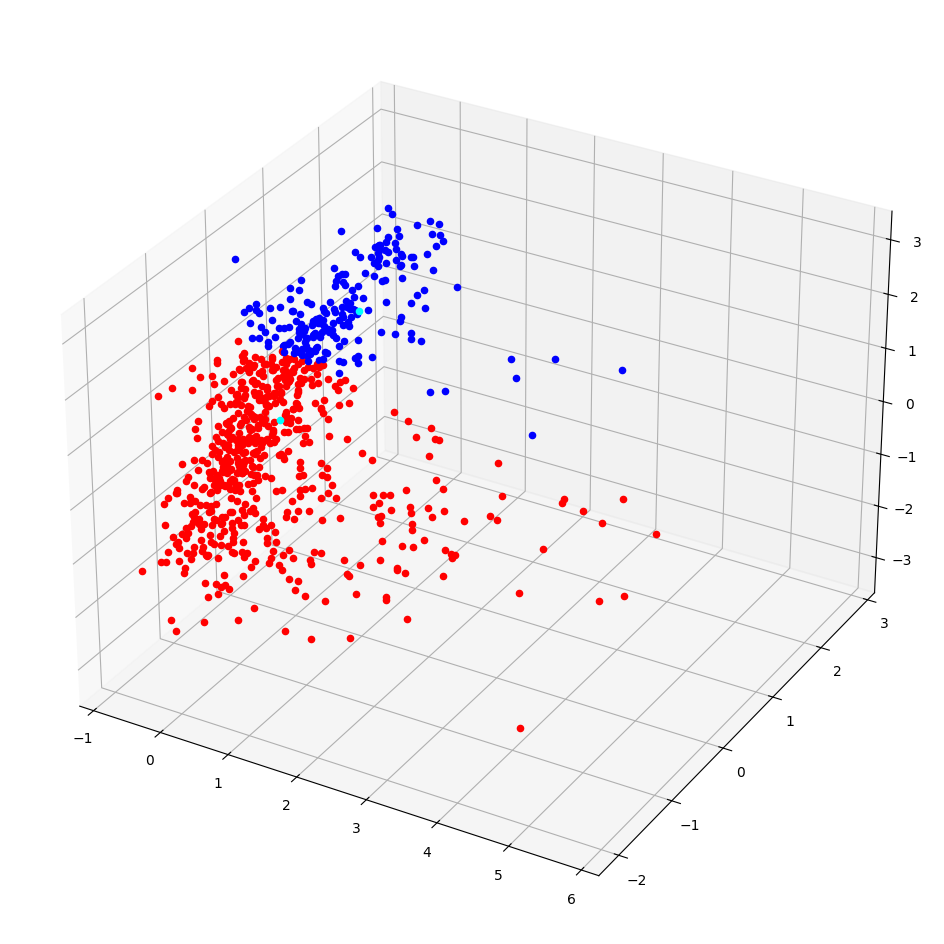

In [51]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data_std.shape[0]):
    if labels_std[i] == 0:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')    

    
for i in range(centroids_std.shape[0]):
   ax.scatter(centroids_std[i][1], centroids_std[i][0], centroids_std[i][2], color='cyan')

plt.show()

In [52]:
label_data = df[['Private']]

private_cnt = df['Private'].value_counts()['Yes']
public_cnt = df['Private'].value_counts()['No']
privates = np.zeros(data_std.shape[1])
publics = np.zeros(data_std.shape[1])

label_data = label_data.to_numpy()

for i in range(data_std.shape[0]):
    if label_data[i] == "Yes":
        privates += data_std[i]
    else:
        publics += data_std[i]

priv = privates / private_cnt
pub = publics / public_cnt

print(priv, "\n")
print(pub)

[ 0.33852738 -0.37706349  0.20591724] 

[-0.9022074   1.00490977 -0.54878886]


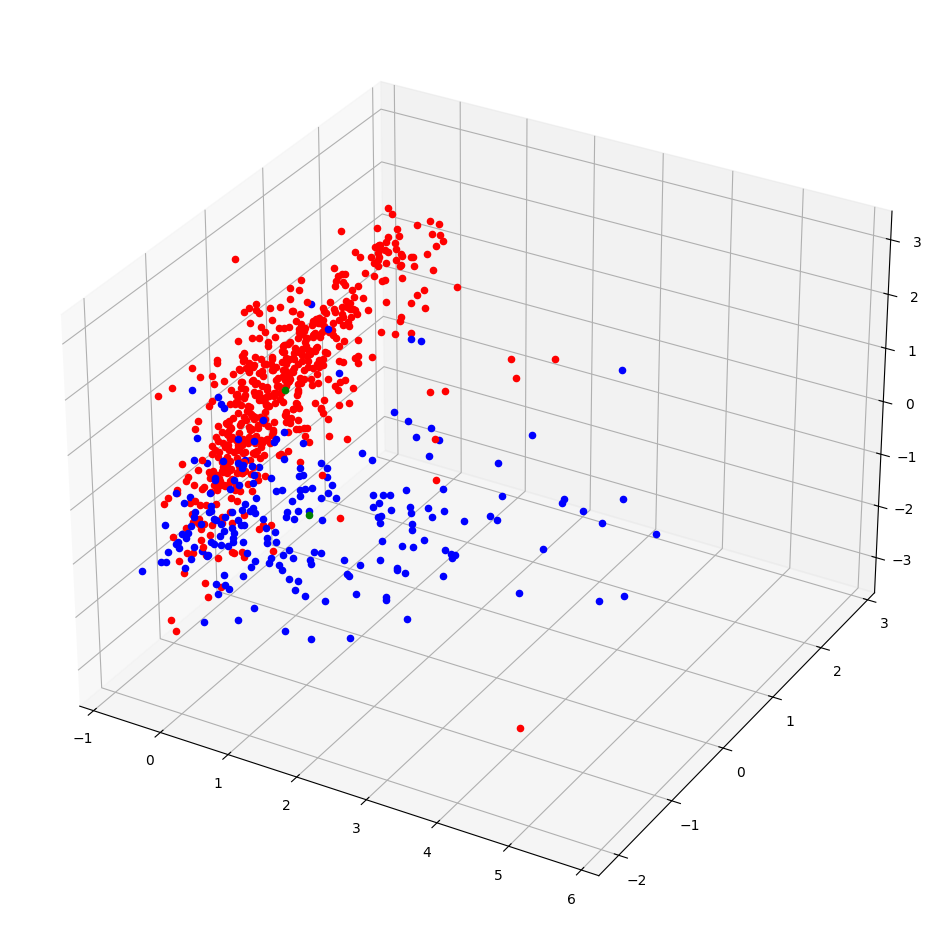

In [53]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data_std.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')    

    
#for i in range(centroids.shape[0]):
#   ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], color='cyan')
    
ax.scatter(-0.37706349,0.33852738,   0.20591724, color='green')
ax.scatter( 1.00490977,-0.9022074, -0.54878886, color='green')

plt.show()

# Compare K-Values

In [54]:
def sum_squared_error(data, centroids, label):
    d = 0
    
    for i in range(data.shape[0]):
        d += np.sum((data[i] - centroids[label[i]]) ** 2)
        
    return d

In [55]:
errors = np.empty(10)
k_values = range(1, 11)  # Try different values of K

for k in k_values:
    centroids, labels = k_means(data, k)
    errors[k] = sum_squared_error(data, centroids, k)

# Plot the scree plot
plt.plot(k_values, errors, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Errors')
plt.title('Scree Plot')
plt.show()

[[10440  3699    65]] 



TypeError: 'int' object is not subscriptable